<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Outils-projet" data-toc-modified-id="Outils-projet-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Outils projet</a></span></li><li><span><a href="#La-lecture-de-l'échantillon-initial" data-toc-modified-id="La-lecture-de-l'échantillon-initial-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>La lecture de l'échantillon initial</a></span></li><li><span><a href="#Le-déclaration-des-classifieurs" data-toc-modified-id="Le-déclaration-des-classifieurs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Le déclaration des classifieurs</a></span></li><li><span><a href="#La-courbe-ROC-(Receiver-Operating-Caracteristic)" data-toc-modified-id="La-courbe-ROC-(Receiver-Operating-Caracteristic)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>La courbe ROC (Receiver Operating Caracteristic)</a></span><ul class="toc-item"><li><span><a href="#La-probabilité-de-prédiction" data-toc-modified-id="La-probabilité-de-prédiction-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>La probabilité de prédiction</a></span></li><li><span><a href="#Le-tableau-des-résultats" data-toc-modified-id="Le-tableau-des-résultats-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Le tableau des résultats</a></span></li><li><span><a href="#Prédiction-à-50%" data-toc-modified-id="Prédiction-à-50%-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Prédiction à 50%</a></span></li><li><span><a href="#Prédiction-à-68,66%" data-toc-modified-id="Prédiction-à-68,66%-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Prédiction à 68,66%</a></span></li><li><span><a href="#Prédiction-à-11,48%" data-toc-modified-id="Prédiction-à-11,48%-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Prédiction à 11,48%</a></span></li></ul></li><li><span><a href="#Calculs-des-métriques" data-toc-modified-id="Calculs-des-métriques-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Calculs des métriques</a></span><ul class="toc-item"><li><span><a href="#La-courbe-ROC" data-toc-modified-id="La-courbe-ROC-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>La courbe ROC</a></span></li><li><span><a href="#Le-changement-du-pas-de-calcul" data-toc-modified-id="Le-changement-du-pas-de-calcul-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Le changement du pas de calcul</a></span></li><li><span><a href="#La-courbe-précision-rappel" data-toc-modified-id="La-courbe-précision-rappel-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>La courbe précision-rappel</a></span></li></ul></li></ul></div>

>> **Vous trouvez les données et leur description :**<br>
>> https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29<br>
>> https://www.kaggle.com/uciml/breast-cancer-wisconsin-data<br>

In [1]:
# import pandas as pd              
# import seaborn as sns  
# import os, warnings

# %pylab inline

# plt.style.use('seaborn-darkgrid')
# sns.set(font_scale=2)
# warnings.filterwarnings(action="ignore")

In [2]:
import pandas as pd, numpy as np, seaborn as sns, warnings, os, sys, time, copy as cp
from datetime import datetime as dt
from matplotlib import pyplot as plt

import matplotlib.font_manager as fm
import plotly.express as px
import plotly.graph_objs as go

font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

warnings.filterwarnings(action="ignore")

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)

# Outils projet

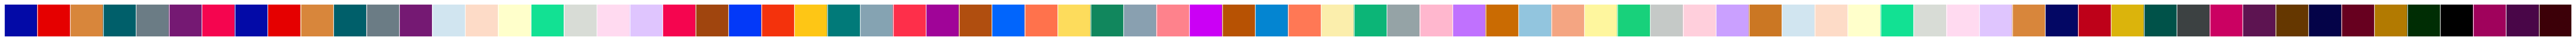

In [3]:
palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973",
            "#f5054f", 
            "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", "#d1e5f0", "#fddbc7",
            "#ffffcb", "#12e193", "#d8dcd6", "#ffdaf0", "#dfc5fe", "#f5054f", "#a0450e",
            "#0339f8", "#f4320c", "#fec615", "#017a79", "#85a3b2", "#fe2f4a", "#a00498", "#b04e0f",
            "#0165fc", "#ff724c", "#fddc5c", "#11875d", "#89a0b0", "#fe828c", "#cb00f5", "#b75203",
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#ffb7ce", "#c071fe", "#ca6b02",
            "#92c5de", "#f4a582", "#fef69e", "#18d17b", "#c5c9c7", "#ffcfdc", "#caa0ff", "#cb7723",
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#ffdaf0", "#dfc5fe", "#d8863b",
            "#030764", "#be0119", "#dbb40c", "#005249", "#3c4142", "#cb0162", "#5d1451", "#653700",
            "#040348", "#67001f", "#b27a01", "#002d04", "#000000", "#a0025c", "#490648", "#3c0008"
          ]
sns.palplot(sns.color_palette(palette))

In [4]:
from datetime import datetime as dt

repertoireRacine  = '.'
nomProjet         = 'ROC Classification Binaire Breast Cancer Wisconsin'

repertoireProjet  = os.path.join(repertoireRacine, nomProjet)
repertoireDonnees = os.path.join(repertoireProjet, 'repertoire.donnees')
repertoireImages  = os.path.join(repertoireProjet, 'repertoire.images')


def controleExistenceRepertoire( repertoire, create_if_needed=True):
    """Voir si le répertoire existe. S'il n'existe pas il est créé."""
    path_exists = os.path.exists(repertoire)
    if path_exists:
        if not os.path.isdir(repertoire):
            raise Exception("Trouvé le nom  "+repertoire +" mais c'est un fichier, pas un répertoire")
            # return False
        return True
    if create_if_needed:
        os.makedirs(repertoire)

def sauvegarderImage( fichier):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    plt.savefig(os.path.join(repertoireImages,
                             fichier+f"--{dt.now().strftime('%Y_%m_%d_%H.%M.%S')}.png"), 
                             dpi=600, 
                             bbox_inches='tight')

def sauvegarderImageSNS( sns_plot, fichier):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    fig = sns_plot.get_figure()
    fig.savefig(os.path.join(repertoireImages,fichier+'.png'))
    
controleExistenceRepertoire(repertoireProjet);
controleExistenceRepertoire(repertoireDonnees);
controleExistenceRepertoire(repertoireImages);

In [5]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import NuSVC, SVC, OneClassSVM
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic, ExpSineSquared, DotProduct, Matern, WhiteKernel

from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from lightgbm import LGBMClassifier
from xgboost  import XGBClassifier
from sklearn.metrics import roc_curve, auc

from sklearn.metrics  import make_scorer, confusion_matrix, roc_curve, auc, accuracy_score, log_loss, hamming_loss, \
                             precision_score, recall_score, f1_score, jaccard_score,  \
                             precision_recall_curve, average_precision_score

In [6]:
from sklearn.preprocessing import LabelEncoder


# La lecture de l'échantillon initial


<img src="https://raw.githubusercontent.com/rbizoi/IntelligenceEnDonneesDeSante/main/images/EchantillonInitial.png" width="800">

In [7]:
nomsDiag = {'M':1,'B':0}
nomsDiagInv = {1:'M',0:'B'}
breastCancer = pd.read_csv('../donnees/Breast Cancer Wisconsin (Diagnostic)/breastCancer.csv', index_col='id').drop(columns='Unnamed: 32')
breastCancer.diagnosis = breastCancer.diagnosis.apply(lambda x : nomsDiag[x])
breastCancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
boxCox  = PowerTransformer(method='box-cox')
X = breastCancer.drop(columns='diagnosis')
y = breastCancer.diagnosis
X = boxCox.fit(X+1).transform(X+1)

X_train, X_test, y_train, y_test = train_test_split( X, 
                                                     y, 
                                                     test_size=0.2, 
                                                     random_state=0, 
                                                     stratify = y
                                                   ) 

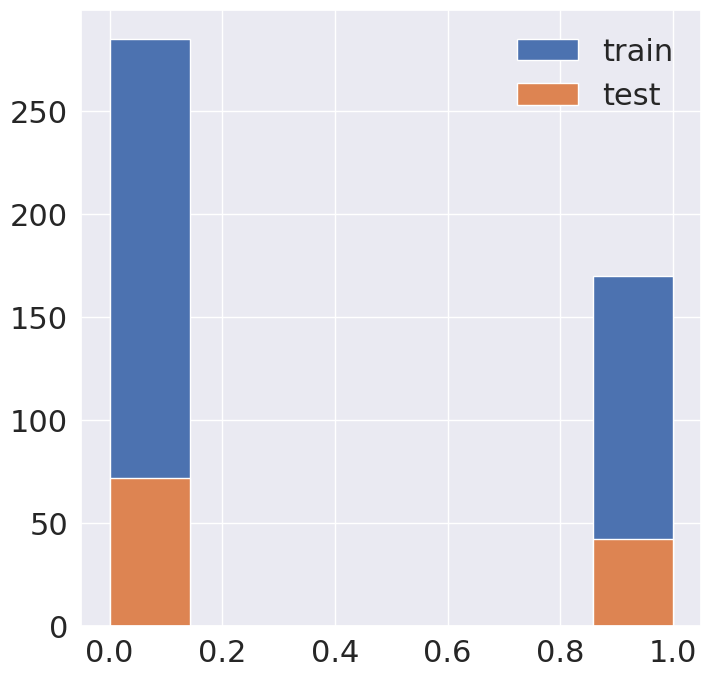

In [9]:
y_train.hist(bins=7, figsize=(8,8), label='train');
y_test.hist(bins=7, figsize=(8,8), label='test');
plt.legend();
sauvegarderImage("La separation des données pour l'apprentissage")

# Le déclaration des classifieurs 

In [10]:
clf = SVC(kernel="linear",C=0.025,probability=True)

# La courbe ROC (Receiver Operating Caracteristic)

0.9824561403508771
L'aire sous la courbe ROC : 0.99404762 
Score de prédiction à 50% : 0.98245614


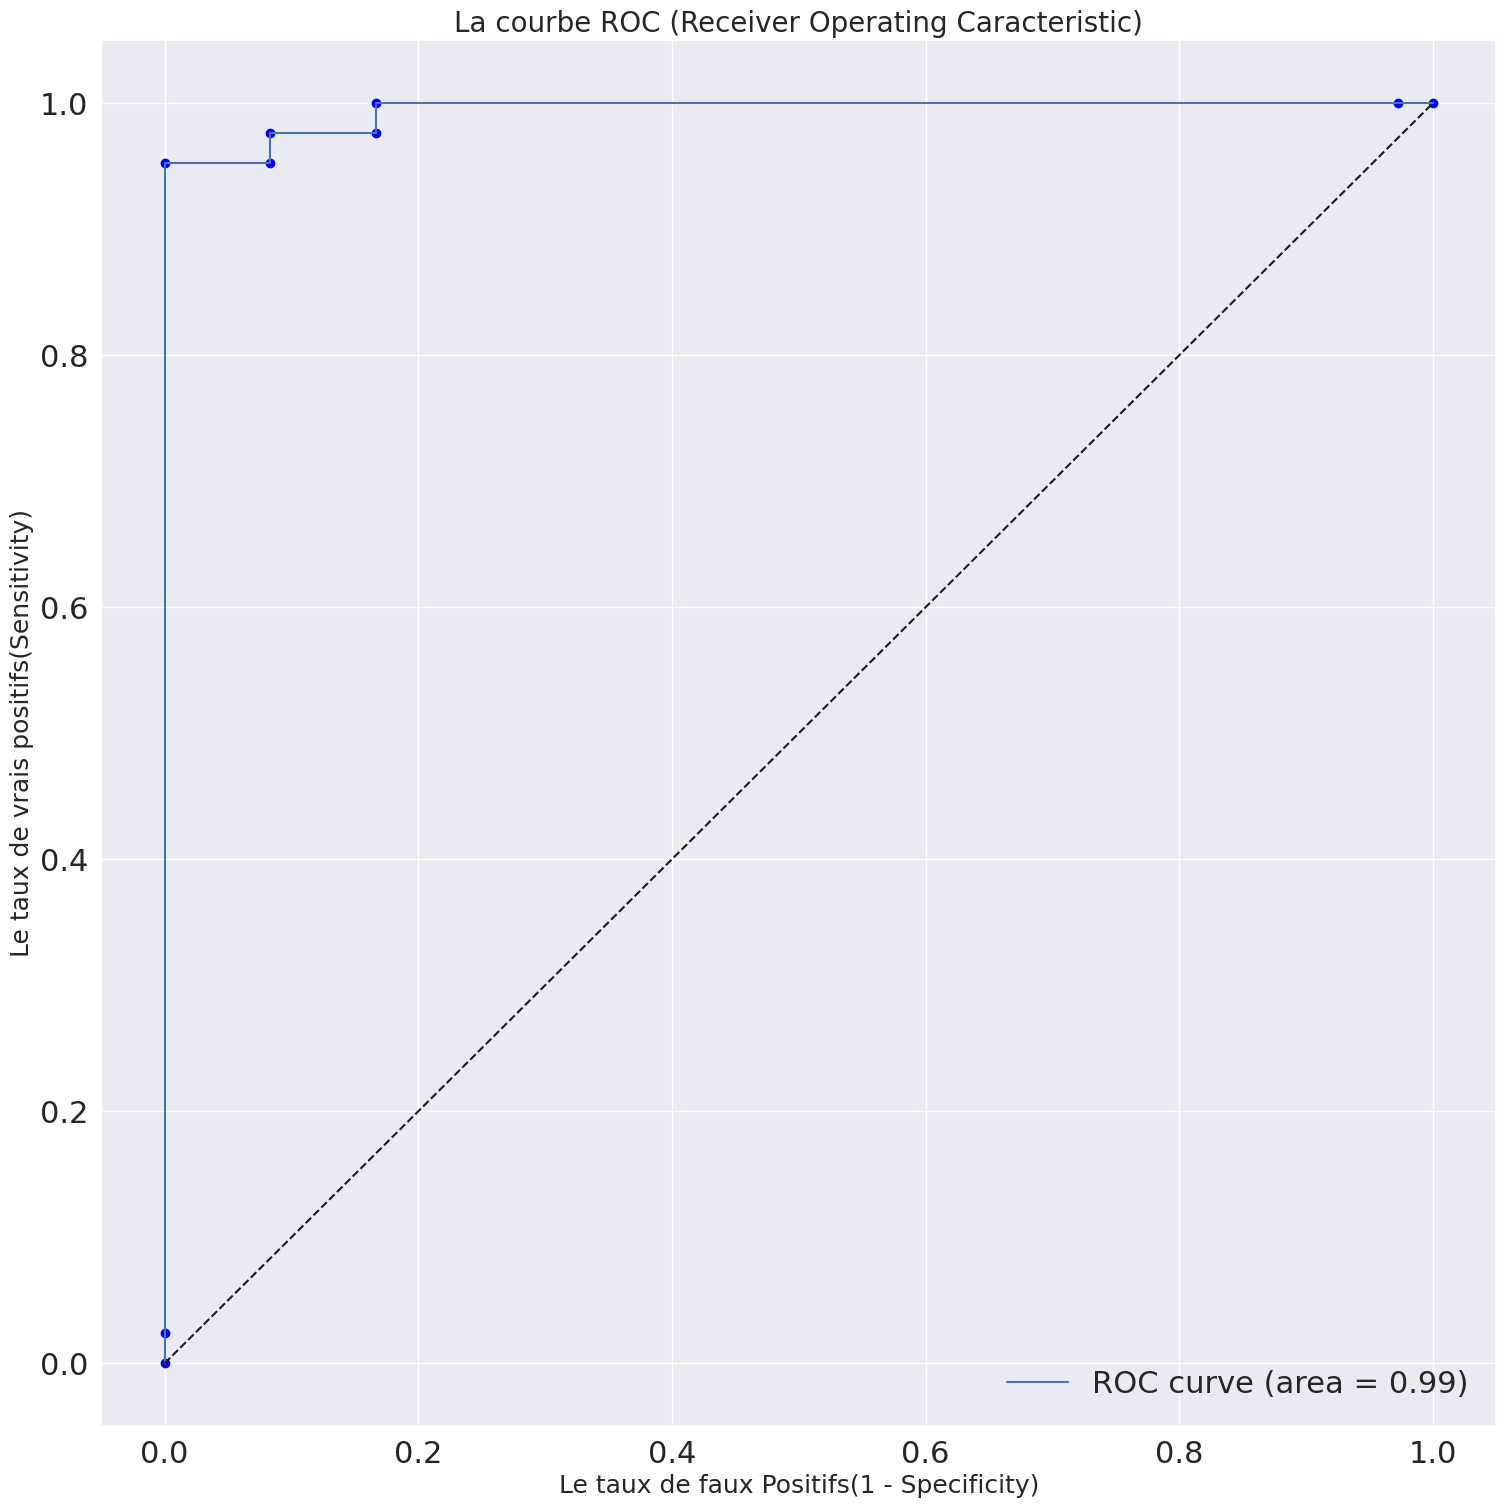

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
probas = clf.predict_proba(X_test)
pred   = clf.predict(X_test) # 50%


import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix

fpr, tpr, thresholds = roc_curve(y_test.ravel(), probas[:, 1])


roc_auc = auc(fpr, tpr)
print ("L'aire sous la courbe ROC : %.8f \nScore de prédiction à 50%% : %.8f" % (roc_auc,clf.score(X_test, y_test)))

plt.figure(figsize=(18, 18))
plt.scatter(fpr, tpr, color='blue')
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Le taux de faux Positifs(1 - Specificity)',size=18)
plt.ylabel('Le taux de vrais positifs(Sensitivity)',size=18)
plt.title('La courbe ROC (Receiver Operating Caracteristic)',size=20)
plt.legend(loc="lower right");

## La probabilité de prédiction

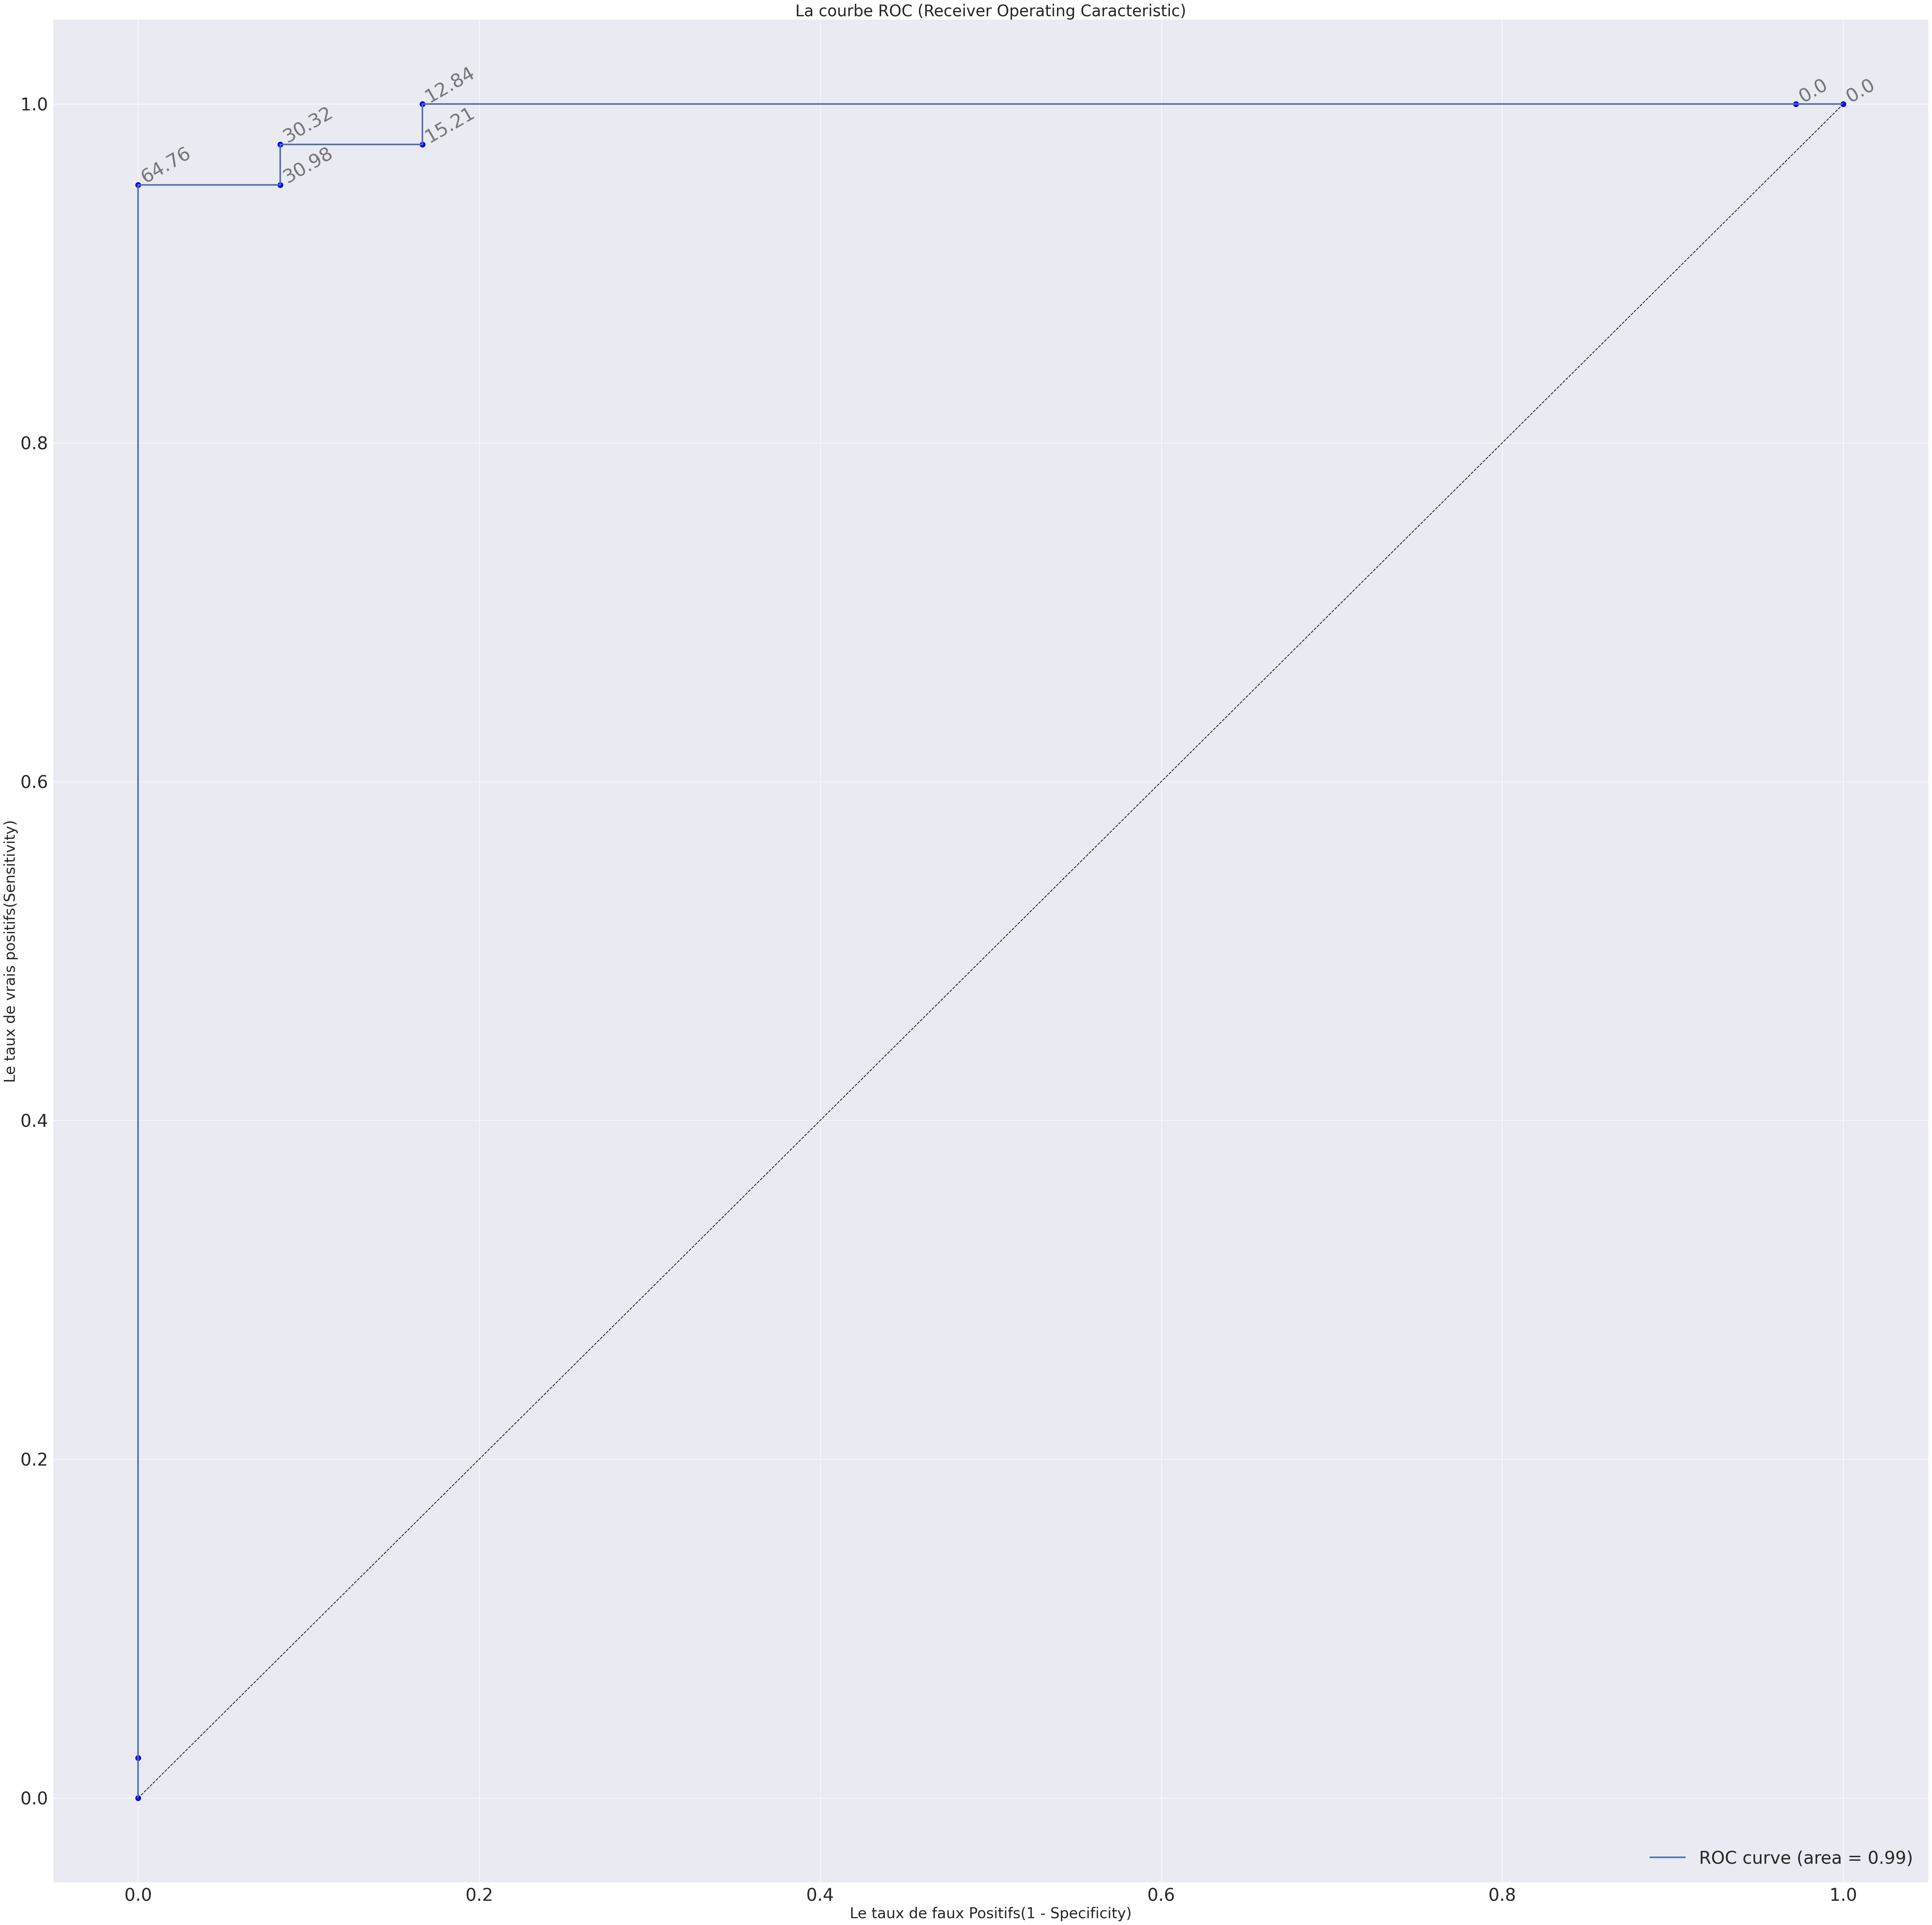

In [12]:
sns.set(font_scale=3)
plt.figure(figsize=(64, 64))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=3)
plt.scatter( fpr, tpr, color='blue', s=100)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

for i,t in enumerate(thresholds*100):
    if i > 1 :
        plt.text(fpr[i], tpr[i]+0.001,str(t.round(2)), rotation= 30, alpha=0.6) 
        
plt.xlabel('Le taux de faux Positifs(1 - Specificity)',size=28)
plt.ylabel('Le taux de vrais positifs(Sensitivity)',size=28)
plt.title('La courbe ROC (Receiver Operating Caracteristic)',size=30)
plt.legend(loc="lower right")        
sns.set(font_scale=2)

## Le tableau des résultats 

In [13]:
print(X_test.shape)
dfROC = pd.DataFrame({'Probabilite':probas[:,1],
                      'Observation':y_test.ravel(),
                      'Prediction':0
                    }).sort_values(by='Probabilite',ascending=False)
dfROC.head(10)

(114, 30)


,Probabilite,Observation,Prediction
67,1.0,1,0
55,1.0,1,0
112,1.0,1,0
11,1.0,1,0
24,1.0,1,0
39,1.0,1,0
75,1.0,1,0
100,1.0,1,0
22,1.0,1,0
92,1.0,1,0


In [14]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.DataFrame(probas,columns=['bénin', 
                             'malin']).sort_values(by ='malin',ascending=False)

,bénin,malin
67,2.163717e-12,1.000000e+00
55,1.606716e-10,1.000000e+00
112,3.514131e-10,1.000000e+00
11,1.166446e-09,1.000000e+00
24,1.897511e-09,1.000000e+00
39,2.092347e-09,1.000000e+00
75,2.417131e-09,1.000000e+00
100,4.550436e-09,1.000000e+00
22,5.507366e-09,1.000000e+00
92,2.663441e-08,1.000000e+00


## Prédiction à 50%

In [15]:
df = dfROC
df.Prediction = df.Probabilite.apply(lambda x: 0 if x < .5 else 1)
pd.crosstab(df.Prediction,df.Observation)

Observation,0,1
Prediction,,
0,71,2
1,1,40


## Prédiction à 68,66%

In [16]:
df = dfROC
df.Prediction = df.Probabilite.apply(lambda x: 0 if x < .686613 else 1)
pd.crosstab(df.Prediction,df.Observation)

Observation,0,1
Prediction,,
0,72,3
1,0,39


## Prédiction à 11,48%

In [17]:
df = dfROC
df.Prediction = df.Probabilite.apply(lambda x: 0 if x < .114893 else 1)
pd.crosstab(df.Prediction,df.Observation)

Observation,0,1
Prediction,,
0,59,0
1,13,42


# Calculs des métriques

In [18]:
def calculMC (df, taux):
    df.Prediction = df.Probabilite.apply(lambda x: 0 
                                         if x < taux else 1)
    tailleEchantillon = df.Observation.count()
    vraisNegatifs     = confusion_matrix(df.Observation, df.Prediction)[0, 0]
    fauxPositifs      = confusion_matrix(df.Observation, df.Prediction)[0, 1]
    fauxNegatifs      = confusion_matrix(df.Observation, df.Prediction)[1, 0]
    vraisPositifs     = confusion_matrix(df.Observation, df.Prediction)[1, 1]

    Sensibilite       = vraisPositifs / (vraisPositifs + fauxNegatifs)
    Specificite       = vraisNegatifs / (fauxPositifs  + vraisNegatifs)

    Precision     = vraisPositifs / (vraisPositifs + fauxPositifs)
    F1Score       = 2 * Precision * Sensibilite / (Precision + Sensibilite)
    
    Prevalence    = (vraisPositifs + fauxNegatifs) / (vraisPositifs + fauxPositifs  + fauxNegatifs + vraisNegatifs)

    valeurPreditePositive = Sensibilite*Prevalence / (Sensibilite*Prevalence + ((1 - Specificite)*(1-Prevalence)))
    valeurPrediteNegative = Specificite*(1-Prevalence)/(Prevalence*(1-Sensibilite) + (Specificite*(1-Prevalence)))
    
    return [Sensibilite,Specificite,Precision,F1Score,valeurPreditePositive,valeurPrediteNegative,vraisPositifs,vraisNegatifs,fauxNegatifs,fauxPositifs]

In [19]:
Sensibilite,Specificite,Precision,F1Score,valeurPreditePositive,valeurPrediteNegative,vraisPositifs,vraisNegatifs,fauxNegatifs,fauxPositifs = \
                        dict(),dict(),dict(),dict(),dict(),dict(),dict(),dict(),dict(),dict()

nb = 10000
for i in range(nb + 1):
    t = (nb - i) / nb
    Sensibilite[t],Specificite[t],Precision[t],F1Score[t],valeurPreditePositive[t],valeurPrediteNegative[t],vraisPositifs[t],vraisNegatifs[t],fauxNegatifs[t],fauxPositifs[t] = calculMC(dfROC, t)   

## La courbe ROC

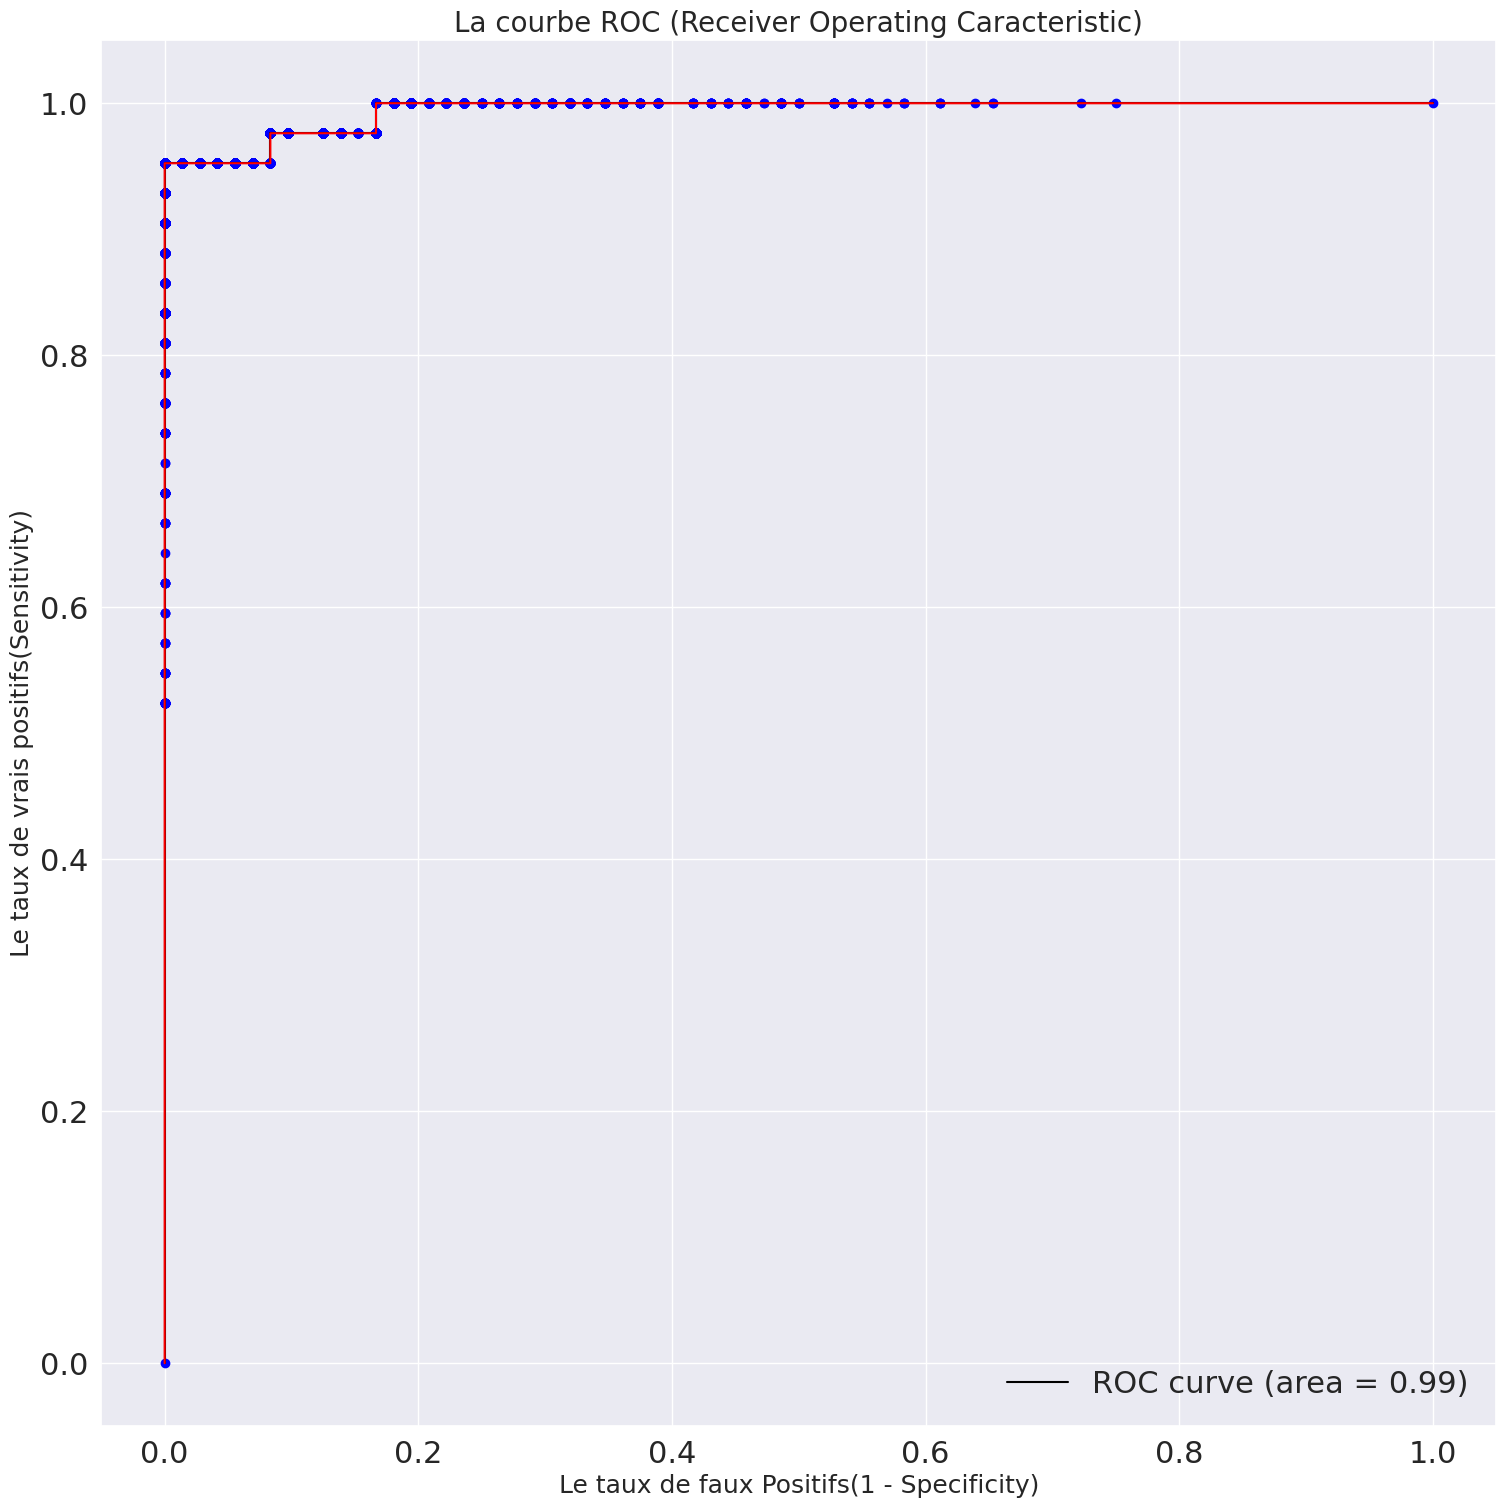

In [20]:
sensibilite = pd.Series(Sensibilite)    
specificite = pd.Series(Specificite)
plt.figure(figsize=(18, 18))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % 
                 roc_auc, color='black')
plt.scatter(1 - specificite,sensibilite, color='blue')
plt.plot(1-specificite,sensibilite, 'b', color='red')

plt.xlabel('Le taux de faux Positifs(1 - Specificity)',size=18)
plt.ylabel('Le taux de vrais positifs(Sensitivity)',size=18)
plt.title('La courbe ROC (Receiver Operating Caracteristic)',size=20)
plt.legend(loc="lower right");

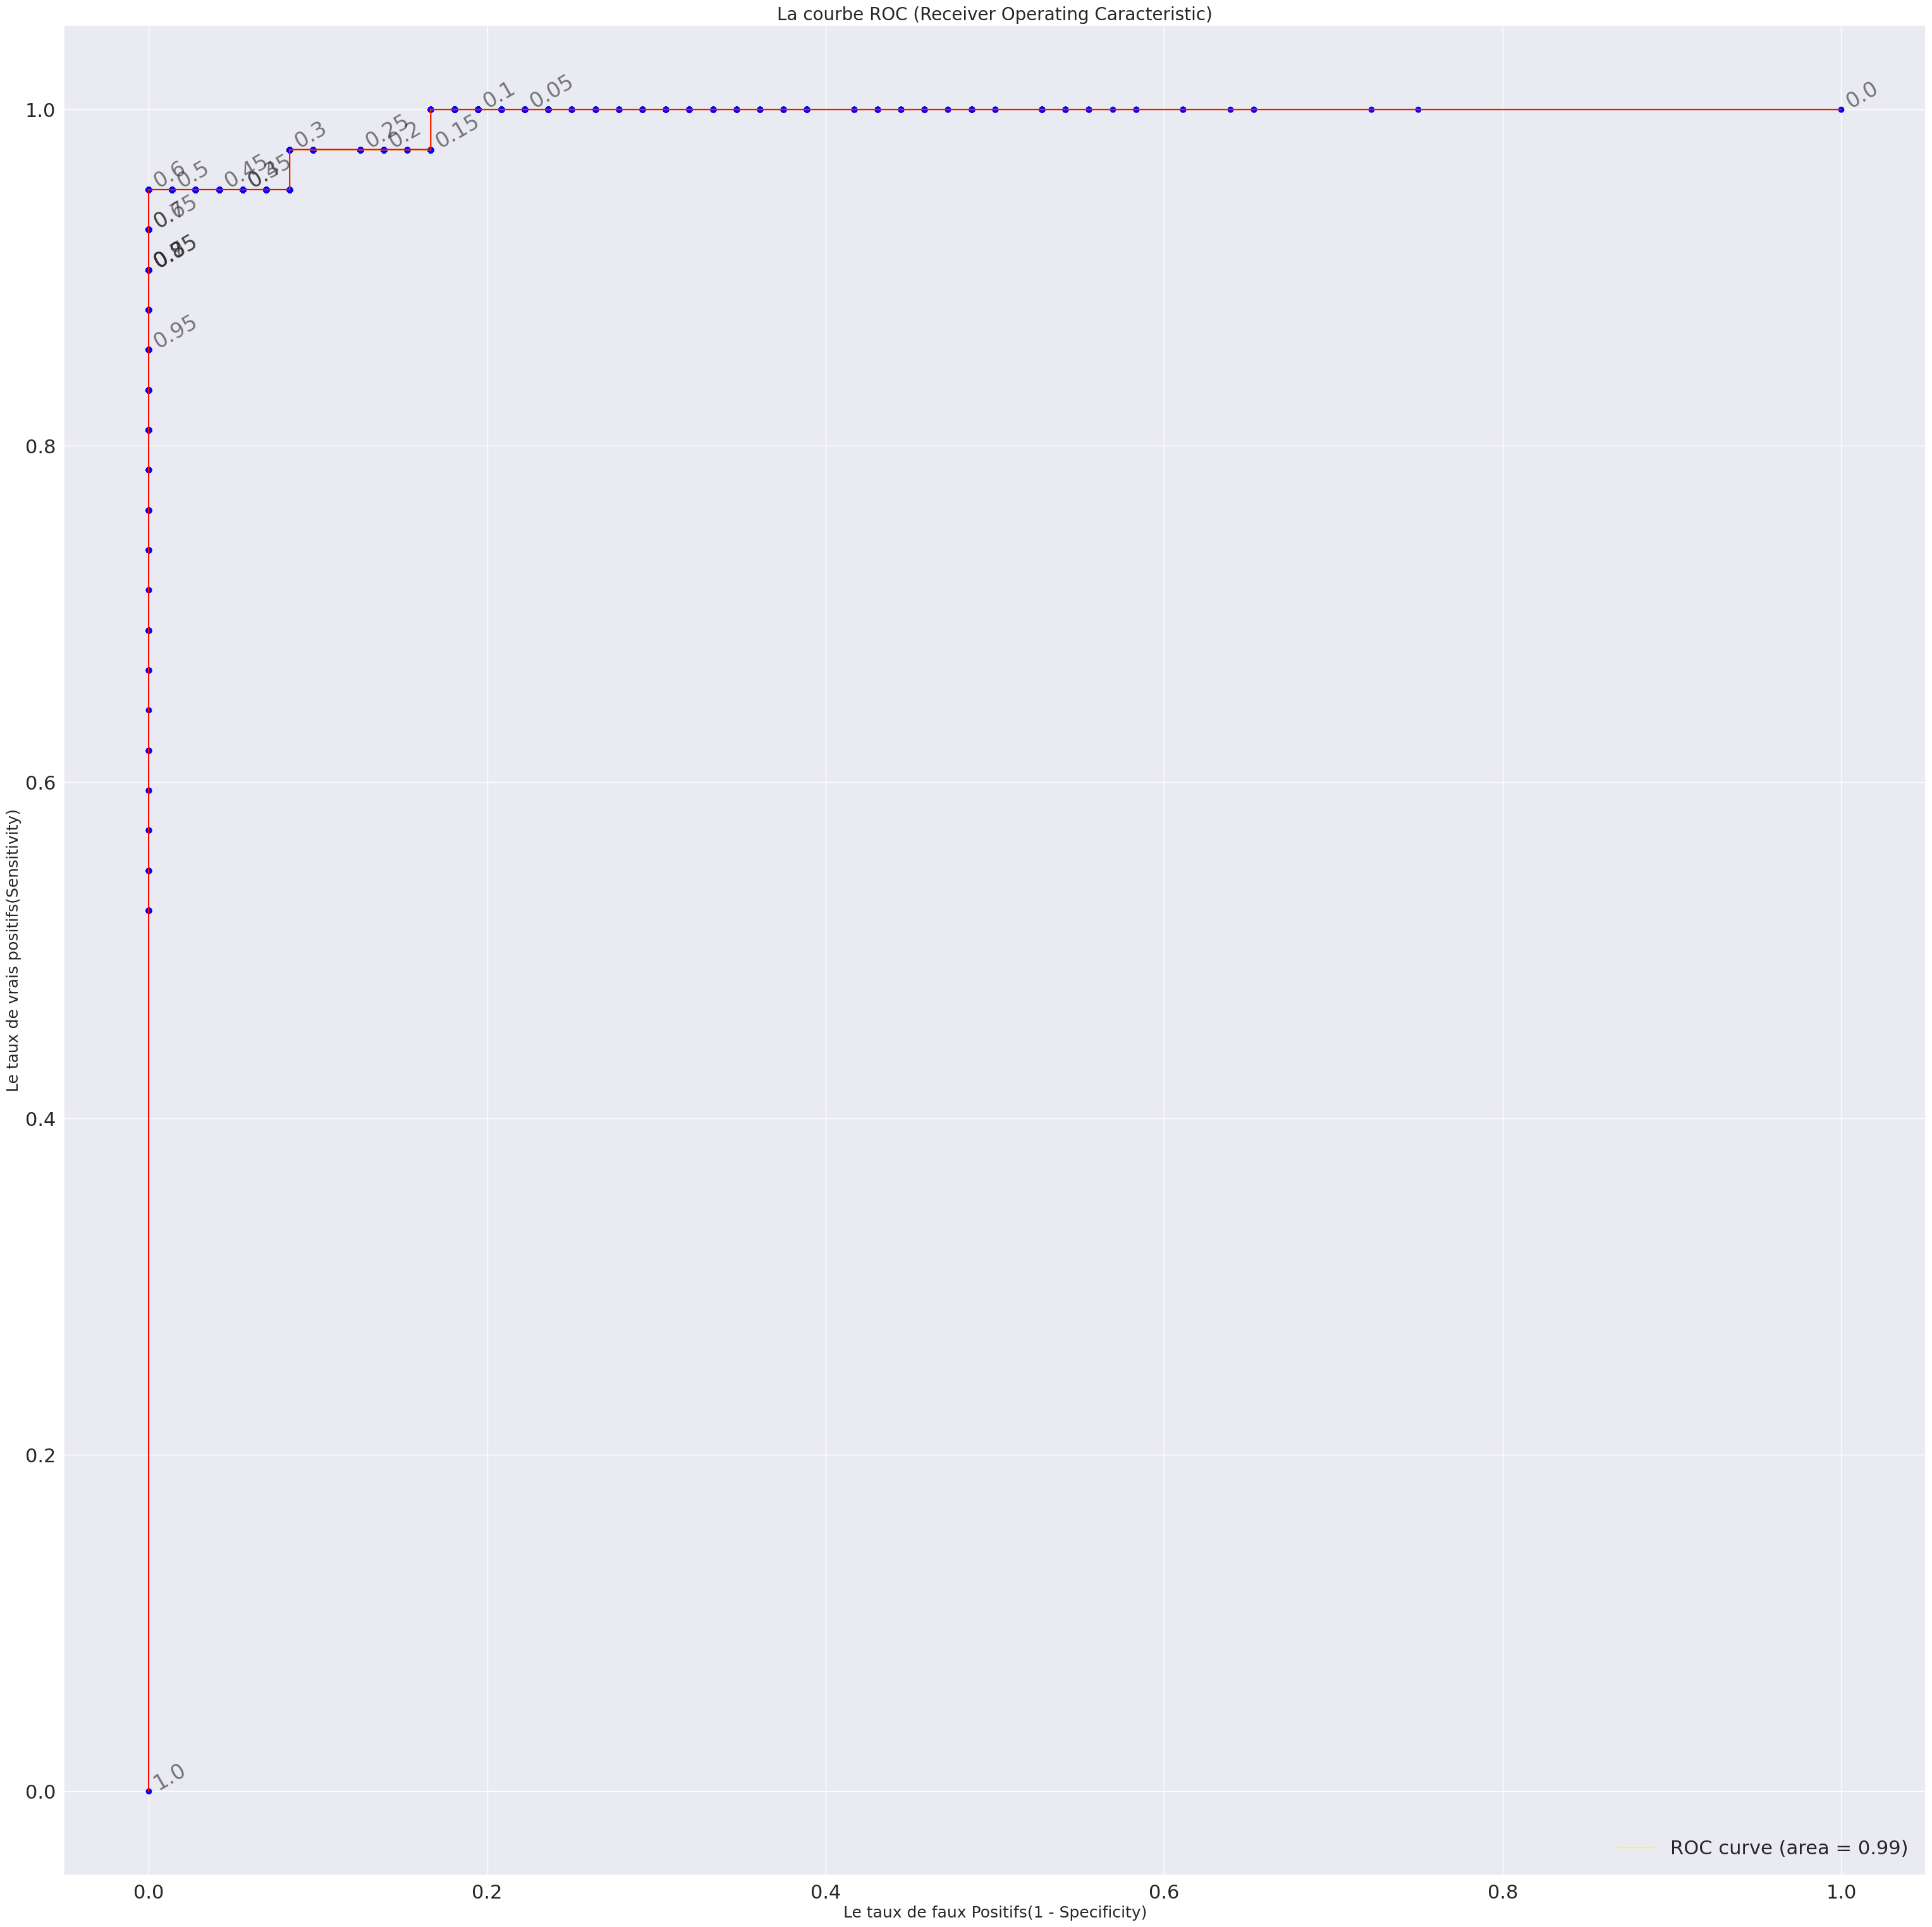

In [21]:
sensibilite = pd.Series(sensibilite)    
specificite = pd.Series(specificite)
plt.figure(figsize=(38, 38))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, 
              color='yellow')
plt.scatter(1 - specificite,sensibilite, color='blue')
plt.plot(1-specificite,sensibilite, 'b', color='red')

for i in sensibilite.index:
    if i*100 % 5 == 0 :
        plt.text(1 - specificite[i]+0.001,sensibilite[i]+0.001,
                 i, rotation= 30, alpha=0.6)   
    
plt.xlabel('Le taux de faux Positifs(1 - Specificity)',size=18)
plt.ylabel('Le taux de vrais positifs(Sensitivity)',size=18)
plt.title('La courbe ROC (Receiver Operating Caracteristic)',size=20)
plt.legend(loc="lower right");

## Le changement du pas de calcul

In [22]:
Sensibilite,Specificite,Precision,F1Score,valeurPreditePositive,valeurPrediteNegative,vraisPositifs,vraisNegatifs,fauxNegatifs,fauxPositifs = \
                        dict(),dict(),dict(),dict(),dict(),dict(),dict(),dict(),dict(),dict()

nb = 10
for i in range(nb + 1):
    t = (nb - i) / nb
    Sensibilite[t],Specificite[t],Precision[t],F1Score[t],valeurPreditePositive[t],valeurPrediteNegative[t],vraisPositifs[t],vraisNegatifs[t],fauxNegatifs[t],fauxPositifs[t] = calculMC(dfROC, t)   

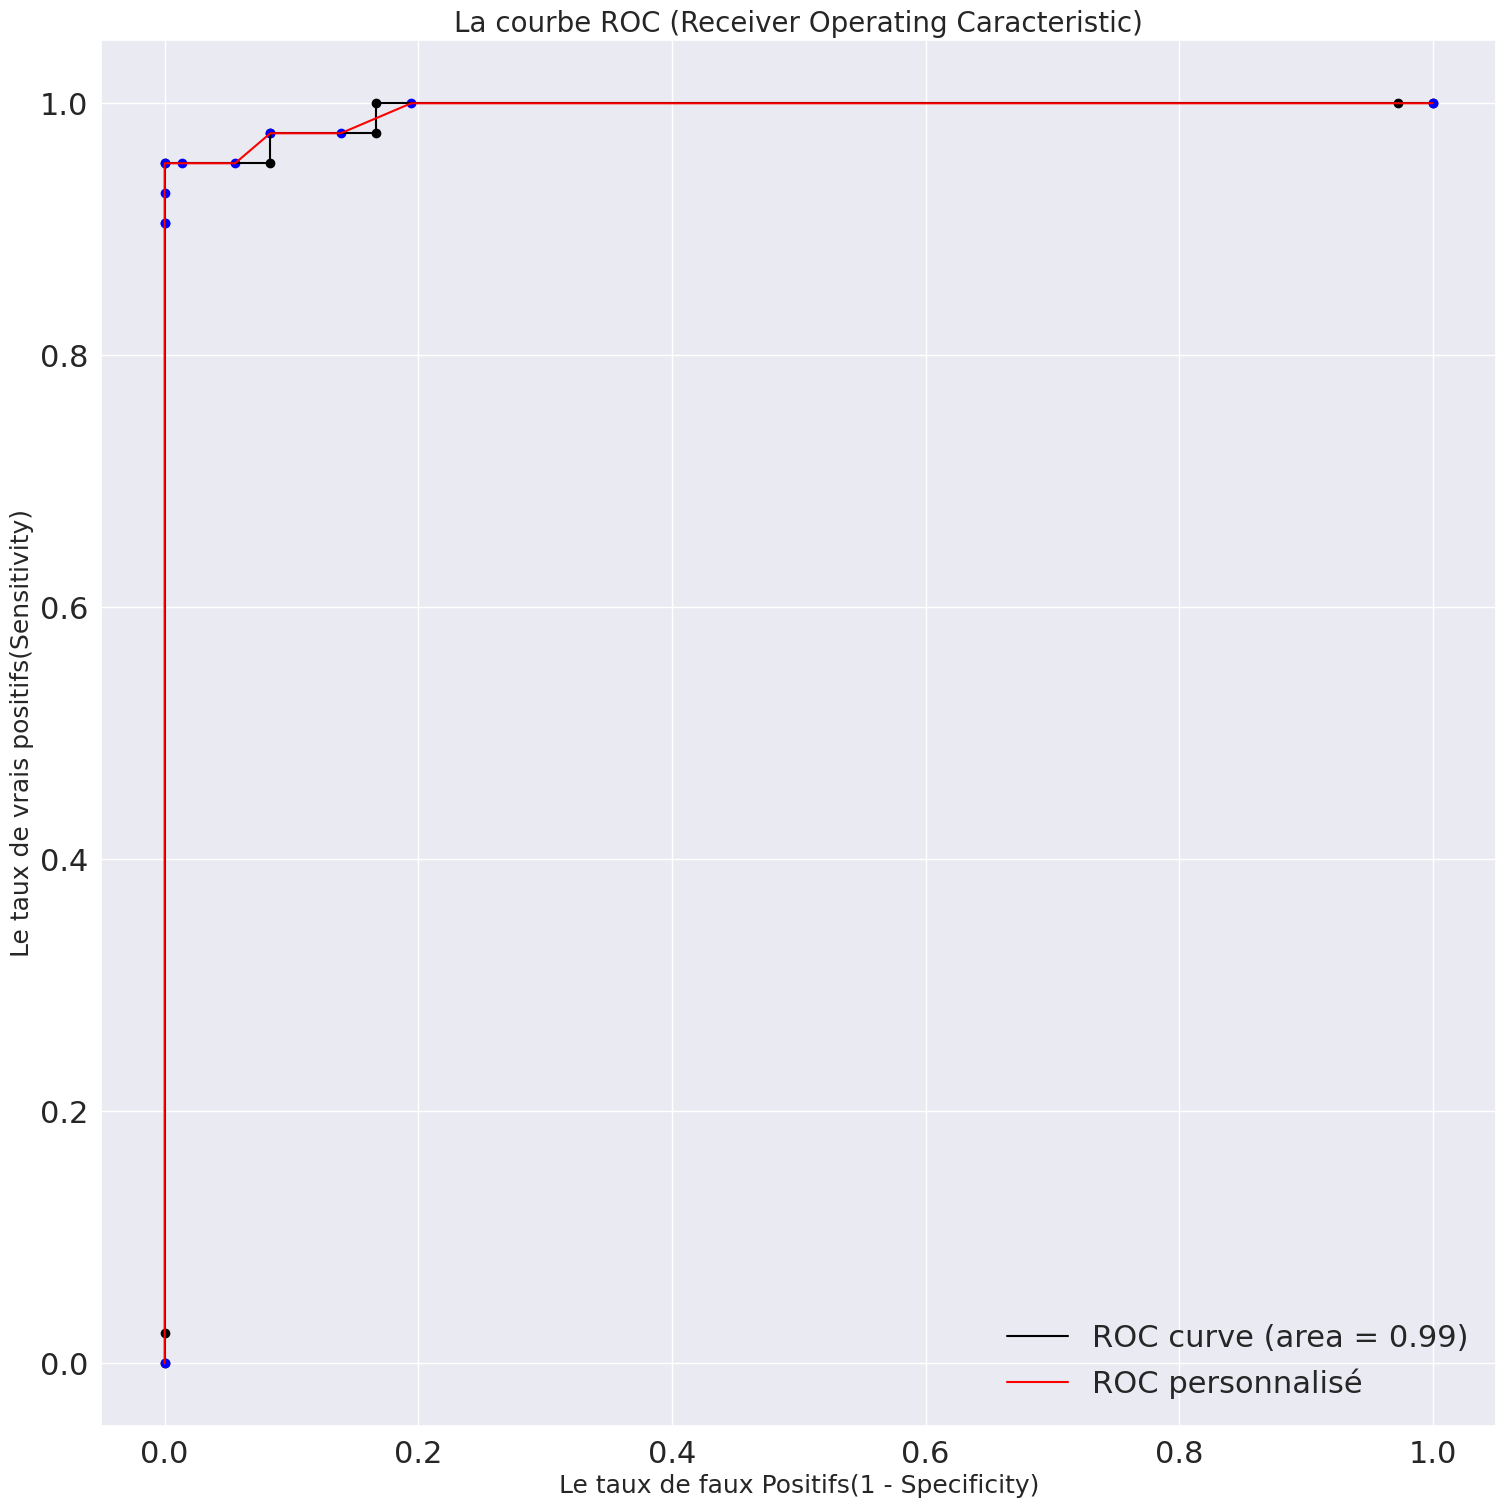

In [23]:
sensibilite = pd.Series(Sensibilite)    
specificite = pd.Series(Specificite)
plt.figure(figsize=(18, 18))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % 
                 roc_auc, color='black')
plt.scatter(fpr, tpr, color='black')
plt.scatter(1 - specificite,sensibilite, color='blue')
plt.plot(1-specificite,sensibilite, 'b', color='red', label='ROC personnalisé')

plt.xlabel('Le taux de faux Positifs(1 - Specificity)',size=18)
plt.ylabel('Le taux de vrais positifs(Sensitivity)',size=18)
plt.title('La courbe ROC (Receiver Operating Caracteristic)',size=20)
plt.legend(loc="lower right");

## La courbe précision-rappel

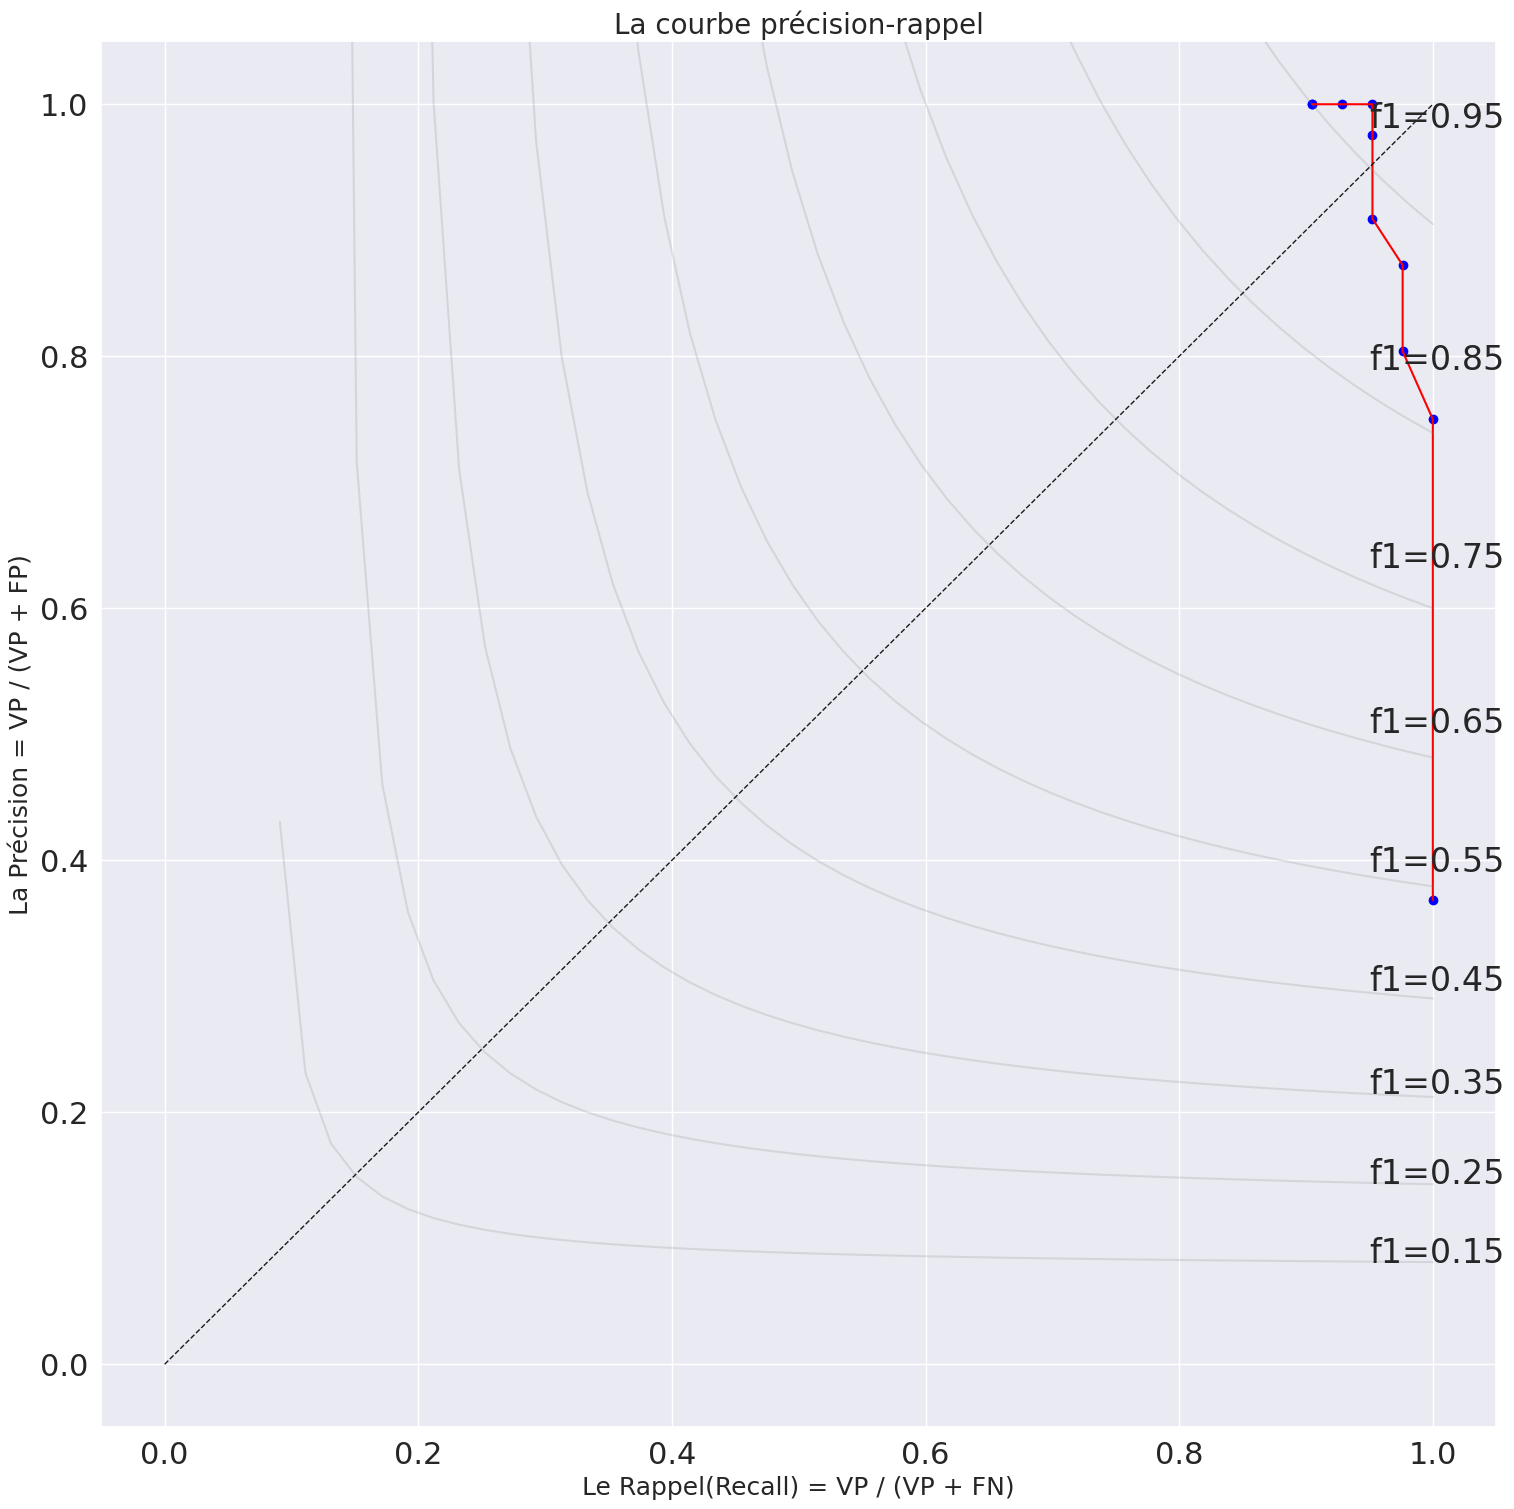

In [24]:
sensibilite = pd.Series(Sensibilite)    
precision = pd.Series(Precision)
plt.figure(figsize=(18, 18))
plt.scatter(sensibilite,precision, color='blue');
plt.plot(sensibilite,precision, 'b', color='red');
f1max = 0.95
f_scores = np.linspace(0.15, f1max, num=9)
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.2f}'.format(f_score), xy=(f1max, y[45] - 0.001))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])    
plt.xlabel('Le Rappel(Recall) = VP / (VP + FN)',size=18);
plt.ylabel('La Précision = VP / (VP + FP)',size=18);    
plt.title('La courbe précision-rappel',size=20);